## Introduction
Because Pittsburgh is always called a food city, we decided to base our metric on density of food per Allegheny county zip code. By "food", we mean places that residents can buy food, like supermarkets, convenience stores, restaurants, and farmers markets. Combined, these places will give us a good idea of how much food there actually is per zip code. Some other options we explored included sorting dog names by neighborhood, health quality per zip code with regard to metrics like obesity and smoking rates, and food quality per zip code. 

## Metric
Our data sets are the following: 
* [Allegheny County Supermarkets and Convenience Stores](https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores/resource/626357fa-c95d-465f-9a02-3121655b2b78)
* [Allegheny County Farmers Markets](https://data.wprdc.org/dataset/allegheny-county-farmers-markets-locations)
* [Allegheny County Restaurant Food Facility Inspections and Locations](https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations)

Our metric is the amount of food facilities per zip code. We chose this specifically because all three of these data sets have a zip code listing. This makes it easier to combine all three of these datasets into one in fewer lines of code, as they all have a common column.  

In [1]:
import pandas as pd
%matplotlib inline

## Convenience Store Data

To begin, we'll look at our convenience store/supermarket dataset. We will first filter out the categories that we don't need, like street name, state, and legal name; we're just looking for the name of the place and its zip code. For the sake of combining data later, we will also rename the name and zip code categories to not be case sensitive. This way, we will be able to use the + operator to combine the sets into a new data frame. Finally, we eliminate any zip code that has less than the average amount of convenience stores and supermarkets. These zip codes will not be relevant in the short term, as we already know that a zip code with such a small amount of convenience stores and supermarkets will not be important to these short term results. 

,name
zip,
15237.0,28
15146.0,22
15222.0,21
15108.0,19
15132.0,19


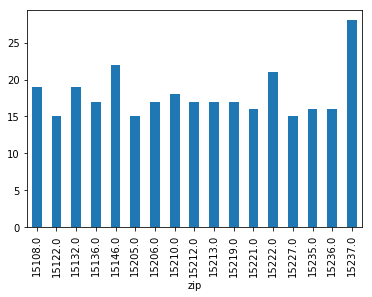

In [3]:
#loading in the data set, and getting rid of extra parameters that we don't need
conveniencemarkets = pd.read_csv("data-conveniencesupermarkets.csv")
conveniencemarkets.drop(['Client ID', 'Legal Name', 'Start Date', 'Street #', 'Street Name', 'State', 'Lat', 'Lon', 'Accuracy', 'Category'], axis=1, inplace=True)

#renames the columns so that when the data sets are combined, they have uniform names
conveniencemarkets.rename(columns={'Name': 'name', 'Zip': 'zip'}, inplace = True)

#counts the number of convenience stores by zip code
ccounts = conveniencemarkets.groupby('zip').count()

#using a temporary variable to get rid of data that is less than half of the maximum count, so that
# when displaying the data the graph is not overcrowded, then both graphing and displaying the data
ccounts_temp = ccounts.loc[ccounts['name'] > ccounts['name'].max()/2]
ccounts_temp.plot.bar(legend = None)
ccounts_temp.sort_values(by=['name'], ascending=False).head(5)

As shown by this dataset, the 15237 zip code has the most convenience stores and supermarkets at 28. This is a zip code classified under Pittsburgh, but it encompasses townships like Ross Township, McCandless, and Franklin Park. Following close behind is 15146 (Monroeville) at 22 supermarkets/convenience stores, and 15222 at 21 supermarkets/convenience stores (Downtown Pittsburgh and the Strip District). 

## Restaurant Data

With our restaurant data, we're going to need to do some more intensive data cleaning. Along with dropping irrelevant categories like seat count, square feet, and ID number, we also need to filter out any duplicates we see. This data set contains data for any food facility that has gotten an inspection over the past few decades. This means that some facilities will be included twice or more times in the set, as some places have data for more than one inspection. As well as filtering out these duplicates, we also need to filter out any retail/convenience stores and chain packaged food stores, because these stores are already covered by the convenience stores/supermarkets dataset. Filtering these stores out ensures that these facilities will not be counted twice in our final graph that combines our datasets. We also filtered out any stores in a municipal outside of Allegheny county to ensure that we only got relevant facilities. Finally, we did the same standard cleaning as the last data set with filtering out below-average zip codes and renaming columns.

,name
zip,
15222,514
15212,458
15213,404
15219,347
15237,314


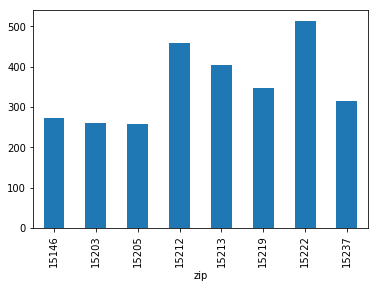

In [4]:
#loading in the restaurant data set
restaurants = pd.read_csv('GeocodedFoodFacilities.csv')

#gets rid of duplicate entries (this data set is food inspections for the restaurants so many have multiple entries)
restaurants.drop_duplicates(subset = ['facility_name','num'], keep = 'first', inplace = True)

#removes any entries that will overlap with other data sets, as well as any outside of Allegheny county
restaurants = restaurants.loc[restaurants['description'] != 'Chain Retail/Convenience Store']
restaurants = restaurants.loc[restaurants['description'] != 'Retail/Convenience Store']
restaurants = restaurants.loc[restaurants['description'] != 'Chain Packaged Food Only']
restaurants = restaurants.loc[restaurants['municipal'] != 'Out Of County']

#gets rid of extra parameters that we do not need
restaurants.drop(['id', 'num', 'street', 'city', 'state', 'municipal', 'category_cd', 'description', 'fdo', 'bus_st_date', 'p_code', 'seat_count', 'noroom', 'sq_feet', 'status', 'placard_st', 'x', 'y', 'address'], axis=1, inplace=True)

#renames the columns so that when the data sets are combined, they have uniform names
restaurants.rename(columns={'facility_name': 'name'}, inplace = True)

#using a temporary variable to get rid of data that is less than half of the maximum count, so that
# when displaying the data the graph is not overcrowded, then both graphing and displaying the data
rcounts = restaurants.groupby('zip').count()
rcounts_temp = rcounts.loc[rcounts['name'] > rcounts['name'].max()/2]
rcounts_temp.plot.bar(legend = None)
rcounts_temp.sort_values(by=['name'], ascending=False).head(5)

Here, 15222 (Downtown and Strip District) has the most restaurants at 514. Second place in this data set goes to 15212 with 458 restaurants in Reserve Township and Millvale. Third place is 15213, which is our very own Oakland with 404 restaurants. 

## Farmers Market Data

Farmers markets make up a much smaller percentage of food facilities in Allegheny County, but this small amount may make or break some zip codes. As such, we followed the same procedure as we did with the convenience stores/supermarkets data set. We dropped irrelevant categories like additional directions and street address, renamed the columns to make them easier to merge with the other two datasets, and, for the sake of short term data analysis, dropped any zip codes that had the lowest amount of farmers markets. 

,name
zip,
15001,4
15065,4
15090,4
15206,4
15208,4
15221,4
15222,4
15037,3
15212,3


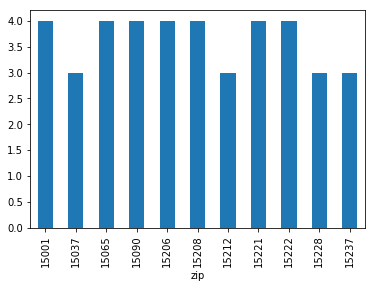

In [6]:
#loading in the farmers market data set
farmersmarkets = pd.read_csv('2019_farmers-markets.csv')

#gets rid of extra parameters that we do not need
farmersmarkets.drop(['Street_Address', 'City', 'State', 'Latitude', 'Longitude', 'Additional_Directions', 'Day_Time', 'Season', 'Affiliations'], axis=1, inplace=True)

#renames the columns so that when the data sets are combined, they have uniform names
farmersmarkets.rename(columns={'Name': 'name', 'Zip': 'zip'}, inplace = True)

#renames the columns so that when the data sets are combined, they have uniform names
fcounts = farmersmarkets.groupby('zip').count()

#using a temporary variable to get rid of data that is less than half of the maximum count, so that
# when displaying the data the graph is not overcrowded, then both graphing and displaying the data
fcounts_temp = fcounts.loc[fcounts['name'] > fcounts['name'].max()/2]
fcounts_temp.plot.bar(legend = None)
fcounts_temp.sort_values(by=['name'], ascending=False)

We very clearly have a lot of ties going on here. This stems from the fact that, as mentioned above, there aren't that many farmers markets compared to convenience stores, supermarkets, and other restaurants. Nonetheless, we still need to take them into account. We have a seven-way tie for first place with these four farmers markets each. These zipcodes are as follows: 
* 15001 (Aliquippa) 
* 15065 (Natrona Heights)
* 15090 (Wexford)
* 15206 (Penn Hills, Ohara, Sharpsburg)
* 15212 (Reserve Township and Millvale)
* 15221 (Wilkinsburg, Churchill, Braddock Hills)
* 15222 (Downtown, Strip District)



## Combined Data

Now, for the moment we've all been waiting for: the merging of the data! First, we create a new dataset that encompases the total amount of convenience stores/supermarkets, restaurants, and farmers markets. Since all the datasets have been cleaned so that they all have the same columns, we can simply use concatination with the + operand to combine these datasets. We made the bar graph a bit bigger so it's easier to see.

,facilities
zip,
15222.0,539.0
15212.0,478.0
15213.0,422.0
15237.0,345.0
15146.0,297.0


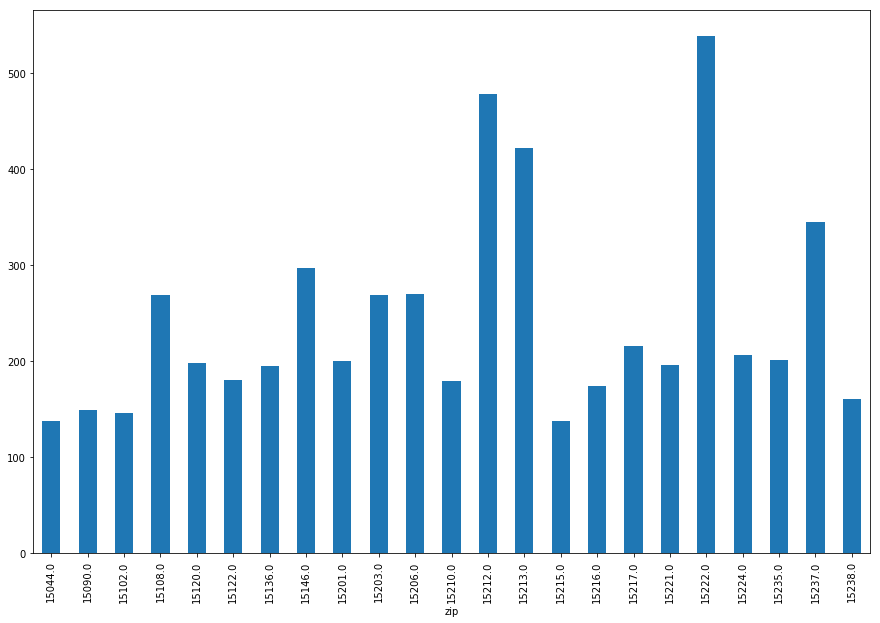

In [10]:
#creating a new dataframe for the combined data
total_counts = pd.DataFrame({'facilities': []})

#summing the counts from all three data sets into this one
total_counts['facilities'] = ccounts['name'] + rcounts['name'] + fcounts['name']

#gets rid of any total counts that are less
total_counts = total_counts.loc[total_counts['facilities'] > total_counts['facilities'].max()/4]

total_counts.plot.bar(figsize=(15,10), legend=None)
total_counts.sort_values(by=['facilities'], ascending=False).head(5)

Clearly, 15222 (Downtown and Strip District) has the largest amount of food facilities at 539, so by our metric, that makes Downtown and the Strip District the best places in Allegheny County! Following behind at 478 facilities is 15212 (Reserve Township and Millvale), and our bronze medal goes to 15213 (Oakland) with 422 facilities. All of these zip codes/neighborhoods are technically still Pittsburgh, so it is no surprise that these neighborhoods come out on top. Granted, these metrics don't take population into account -- restaurants per capita was out of the question because we couldn't find a data set that had what we needed, but in any case, more is always better, especially with food!

## Conclusion

("Reflect on how the data driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this")

**Lindsey**:

The data does differ from my actual favorite neighborhood/zip code, but that's mostly because of bias towards my hometown. I hail from 15025 (Jefferson Hills/Clairton) and am most familiar with the restaurants from around there. It makes sense that Downtown/Strip District won, though; it's more population-dense, for one thing, and there are a lot of good restaurants there. However, I just prefer the food from home, especially now that I'm in college and am not around it nearly as much as I used to be. 